In [ ]:
include("ControlUN.jl")


# Control --- Estabilidad y Respuesta en tiempo
### Mayo 13, 2025


>1. **Principio del argumento** Vamos a considerar una curva suave $C$ en el plano complejo $\mathbb{C}$, en forma de circunferencia de radio 10, y centro en $s=12$. 

 >>  a. Defina una sucesión de punto $s_1, s_2, \ldots,s_{100}$ distribuidos en la curva $C$, recorriendo la circunferencia en el sentido horario


In [ ]:
#Informacion de codigo
# N -> numero de puntos del circulo
# r - > radio del circulo
# c -> Punto central del circulo
# ang -> Angulo

using Plots

N = 100
r = 10
c = 12

# Creacion del arreglo angulos de los 100 puntos  
ang = range(0, 2π, length=N+1)[1:end-1]  

# Creacion de los puntos en un plano complejo
# 1im -> numero imaginario

s = c .+ r * exp.(1im .* ang)  

plot(real(s), imag(s), seriestype=:scatter, aspect_ratio=1, title="Puntos en la curva del plano complejo", xlabel="Reales", ylabel="Imaginarios")


 >> b. Grafique la curva imagen $1+L(C)= \{ z\in\mathbb{C}: z= 1+L(s),s\in C\}$, donde 
 $$
 L(s)=\frac{2s^2 + 4s + 6.5}{s^2 + 5.5s + 2.5} 
 $$

  >> Cuente cuántas vueltas da alrededor del origen $s=0$ y en qué sentido las da. Repita el cálculo y la gráfica, para la imagen de $L(C)= \{ z\in\mathbb{C}: z= L(s),s\in C\}$. Cuente las vueltas que dá, alrededor de $s=-1$. Dibuje las dos imágenes en la misma gráfica, con diferentes colores.


In [ ]:
#punto B

using Plots
using LinearAlgebra

# Definir la función L(s)
La(s) = (2s^2 + 4s + 6.5) / (s^2 + 5.5s + 2.5)



# Calcular la imagen de la curva bajo L(s)
Lac = La.(s)
La1c = 1 .+ Lac

# Función para contar las vueltas alrededor de un punto
function winding_number(curva, punto)
    arg_diffs = diff(angle.(curva .- punto))
    # Corregir saltos de ±2π
    arg_diffs = map(x -> mod(x + π, 2π) - π, arg_diffs)
    return round(sum(arg_diffs) / (2π))
end

# Calcular número de vueltas
vueltas_0 = winding_number(La1c, 0)     # 1 + L(C) alrededor de 0
vueltas_m1 = winding_number(Lac, -1)    # L(C) alrededor de -1

println("Vueltas alrededor del origen (1 + L(C)): ", vueltas_0)
println("Vueltas alrededor de -1 (L(C)): ", vueltas_m1)

# Graficar ambas curvas
plot(real(Lac), imag(Lac), label="L(C)", color=:blue, aspect_ratio=:equal)
plot!(real(La1c), imag(La1c), label="1 + L(C)", color=:red)
scatter!([0], [0], label="origen", color=:black, marker=:x)
scatter!([-1], [0], label="-1", color=:green, marker=:x)
title!("Curvas L(C) y 1 + L(C)")
xlabel!("Re")
ylabel!("Im")




 >>c. Repita la parte a. para la función 
 $$
 L(s)=\frac{2s^2 + 4s + 6.5}{s^2 - 4.5s - 2.5} 
 $$

In [ ]:
#Punto C

using Plots
using LinearAlgebra

# Definir la función L(s)
L_c(s) = (2s^2 + 4s + 6.5) / (s^2 - 4.5s - 2.5)



# Calcular la imagen de la curva bajo L(s)
Lcc = L_c.(s)
Lc1 = 1 .+ Lcc

# Función para contar las vueltas alrededor de un punto
function winding_number(curva, punto)
    arg_diffs = diff(angle.(curva .- punto))
    # Corregir saltos de ±2π
    arg_diffs = map(x -> mod(x + π, 2π) - π, arg_diffs)
    return round(sum(arg_diffs) / (2π))
end

# Calcular número de vueltas
vueltas_0 = winding_number(Lcc, 0)     # 1 + L(C) alrededor de 0
vueltas_m1 = winding_number(Lc1, -1)    # L(C) alrededor de -1

println("Vueltas alrededor del origen (1 + L(C)): ", vueltas_0)
println("Vueltas alrededor de -1 (L(C)): ", vueltas_m1)

# Graficar ambas curvas
plot(real(Lcc), imag(Lcc), label="L(C)", color=:blue, aspect_ratio=:equal)
plot!(real(Lc1), imag(Lc1), label="1 + L(C)", color=:red)
scatter!([0], [0], label="origen", color=:black, marker=:x)
scatter!([-1], [0], label="-1", color=:green, marker=:x)
title!("Curvas L(C) y 1 + L(C)")
xlabel!("Re")
ylabel!("Im")







 >> d. Repita la parte a. para la función 
 $$
 L(s)=\frac{2s^3 - 4s^2 - 9.5s - 26}{s^4 + 1.5s^3 - 24.5s^2 - 37.5s - 12.55} 
 $$


In [ ]:
#Punto d

using Plots
using LinearAlgebra

# Definir la función L(s)
L_d(s) = (2s^3 - 4s^2 - 9.5s - 26) / (1s^4 + 1.5s^3 - 24.5s^2 - 37.5s - 12.55)



# Calcular la imagen de la curva bajo L(s)
Ld = L_d.(s)
Ld1 = 1 .+ Lcc

# Función para contar las vueltas alrededor de un punto
function winding_number(curva, punto)
    arg_diffs = diff(angle.(curva .- punto))
    # Corregir saltos de ±2π
    arg_diffs = map(x -> mod(x + π, 2π) - π, arg_diffs)
    return round(sum(arg_diffs) / (2π))
end

# Calcular número de vueltas
vueltas_0 = winding_number(Ld, 0)     # 1 + L(C) alrededor de 0
vueltas_m1 = winding_number(Ld1, -1)    # L(C) alrededor de -1

println("Vueltas alrededor del origen (1 + L(C)): ", vueltas_0)
println("Vueltas alrededor de -1 (L(C)): ", vueltas_m1)

# Graficar ambas curvas
plot(real(Ld), imag(Ld), label="L(C)", color=:blue, aspect_ratio=:equal)
plot!(real(Ld1), imag(Ld1), label="1 + L(C)", color=:red)
scatter!([0], [0], label="origen", color=:black, marker=:x)
scatter!([-1], [0], label="-1", color=:green, marker=:x)
title!("Curvas L(C) y 1 + L(C)")
xlabel!("Re")
ylabel!("Im")





In [ ]:
# use la función 
# freqresp(sys, w)
# para los valores (complejos) en {s_i}

> 2. Construya un diagrama de Nyquist para las funciones a continuación y determine si el sistema de lazo cerrado de control Proporcional, con ganancia $k=1$ es estable. Encuentre la máxima ganancia $k_{\max}$ que se puede usar en el controlador sin que el sistema de lazo cerrado se vuelva inestable.
>> Construya el diagrama de Nyquist de $k_{\max}L(s)$. Dibuje las dos imágenes en la misma gráfica, con diferentes colores.

>> a. 
$$
 L(s)=\frac{1}{(s+1)(s+0.5)} 
$$




MethodError: MethodError: no method matching isnan(::Matrix{Float64})
The function `isnan` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  isnan(!Matched::Missing)
   @ Base missing.jl:101
  isnan(!Matched::BigFloat)
   @ Base mpfr.jl:1044
  isnan(!Matched::ForwardDiff.Dual)
   @ ForwardDiff ~/.julia/packages/ForwardDiff/UBbGT/src/dual.jl:389
  ...


Polos del lazo cerrado (k=1): ComplexF64[-0.7499999999999999 + 0.9682458365518543im, -0.7499999999999999 - 0.9682458365518543im]
¿Estable con k=1?: true
¿K maximo?: 1.0000006249999297e6


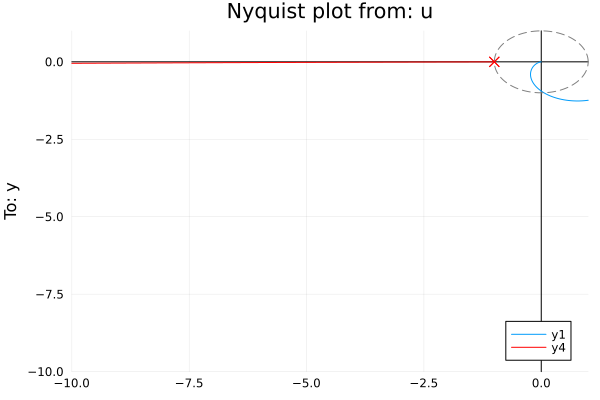

In [49]:
# Caso A
using ControlSystems
using Plots
using LinearAlgebra
using Statistics




L_2a = zpk([],[-1, -0.5],1)

#  Diagrama de Nyquist para k = 1
fig_2a = nyquistplot(L2a; unit_circle=true)  
re_n, im_n, w = nyquistv(L_2a) 
mag = sqrt.(re_n.^2 + im_n.^2)
phase = atan.(im_n, re_n) # en radianes

# Sistema en lazo cerrado con k = 1
G_2a = feedback(L_2a,1)

# Ajustamos fase a rango -π a π
phase_adj = map(x -> x < -π ? x + 2π : x, phase)

# Encontrar índice más cercano a -π (o -180°)
idx = findmin(abs.(phase_adj .+ π))[2]
mag_crit = mag[idx]

Kmax = 1/mag_crit


println("Polos del lazo cerrado (k=1): ", poles(G_2a))
println("¿Estable con k=1?: ", isstable(G_2a))
println("¿K maximo?: ", Kmax)



fig_2a
fig_3 = nyquistplot!((1*10^6)*L_2a,xlims=(-10, 1), ylims=(-10, 1),linecolor="red")


fig_2a
fig_3






>> b. 
$$
 L(s)=\frac{1}{s(s+0.5)} 
$$

Polos del lazo cerrado (k=1): ComplexF64[-0.24999999999999997 + 0.9682458365518543im, -0.24999999999999997 - 0.9682458365518543im]
¿Estable con k=1?: true
¿K maximo?: 10000.12499921876


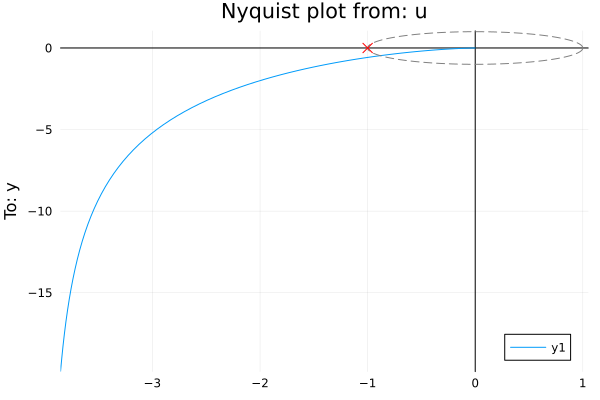

In [58]:
# Caso b
using ControlSystems
using Plots
using LinearAlgebra
using Statistics




L_2b = zpk([],[0, -0.5],1)

#  Diagrama de Nyquist para k = 1
fig_2b = nyquistplot(L_2b; unit_circle=true)  
re_n, im_n, w = nyquistv(L_2b) 
mag = sqrt.(re_n.^2 + im_n.^2)
phase = atan.(im_n, re_n) # en radianes

# Sistema en lazo cerrado con k = 1
G_2b = feedback(L_2b,1)

# Ajustamos fase a rango -π a π
phase_adj = map(x -> x < -π ? x + 2π : x, phase)

# Encontrar índice más cercano a -π (o -180°)
idx = findmin(abs.(phase_adj .+ π))[2]
mag_crit = mag[idx]

Kmax = 1/mag_crit


println("Polos del lazo cerrado (k=1): ", poles(G_2b))
println("¿Estable con k=1?: ", isstable(G_2b))
println("¿K maximo?: ", Kmax)



fig_2b









>> c. 
$$
 L(s)=\frac{1}{(s+1)(s+0.5)(s+2)} 
$$

>> d. 
$$
 L(s)=\frac{s+2}{(s+1)(s-0.5)} 
$$


In [1]:
1+1

2


> 3. En este taller vamos a estudiar la relación entre la localización de los polos de una función de transferencia y las características  de su respuesta dinámica. Vamos a ver también el efecto que tienen los ceros, especialmente en el caso de ceros en el semiplano derecho de del plano complejo $\mathbb{C}.
$

> Considere la función de transferencia 
$$
T(s) = \dfrac{k\,\omega_n^2}{s^2+2\zeta\omega_n\,s+\omega_n^2} =
\frac{k\,\omega_n^2}{(s-\sigma-j\omega_d)(s-\sigma+j\omega_d)}
$$
> donde 
$$
\sigma = \zeta\omega_n; \qquad \omega_d = \omega_n\sqrt{1-\zeta^2}
$$
y
$$
p_{1,2}=\sigma\pm j\,\omega_d = \omega_n e^{\pm j(\pi-\theta)}
$$



> Encuentre los polos del sistema y calcule la respuesta en el tiempo ante un impulso y ante un escalón unitario, para  las combinaciones de los siguientes parámetros que se indican al final.

>> a. $k=1,2$

>> b. $\omega_n \in \{0.01, 0.1, 1, 10, 100\}$. (`logrange(1E-2, 1E2, length=5)`)

>> c. $\zeta \in \{0.2,0.4,0.6,0.8,1,1.2\}$. (`0.2, 0.2:1.2`)

> En cada caso, para la respuesta a un escalón, calcule el **sobrepico en \% ($SP$)**, el **tiempo de asentamiento** ($t_s$),  el \textbf{tiempo de ascenso} ($t_r$), el **tiempo del pico** ($t_p$), el **valor final** ($\lim_{t\to\infty}t(t)$), el valor de $\sigma$ y el ángulo $\theta$, en grados. 

> Va a obtener una gran cantidad de gráficas. Organícelas de la siguiente manera:

>> Para $\omega_n=1$, todos los valores de $\zeta$ y $k\in\{1,2\}$. Qué concluye?


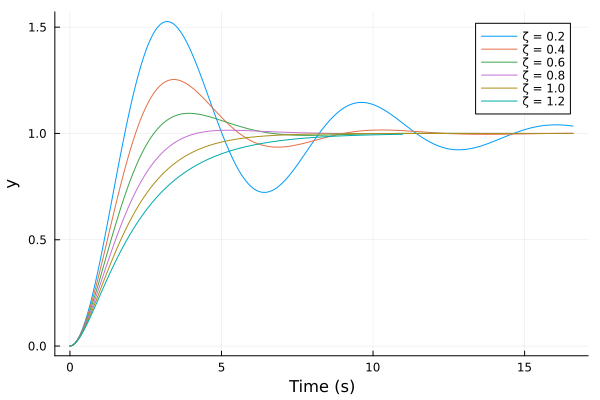

In [2]:
using ControlSystems
using Plots
s = tf("s")
ω = 1
ζs = [0.2,0.4,0.6,0.8,1,1.2]
k = 1
T = TransferFunction[k * ω^2/(s^2 + 2ζ * ω * s + ω^2) for ζ in ζs]
plot(step.(T), label=["ζ = 0.2" "ζ = 0.4" "ζ = 0.6" "ζ = 0.8"  "ζ = 1.0"  "ζ = 1.2"])

>> Para $\zeta=0.4$, $k=1$ y $\omega_n \in \{1, 2, 3,4, 5\}$


>> Para $\zeta=0.6$, $k=1$ y $\omega_n \in \{1, 2, 3,4, 5\}$


>> Para $\zeta=1$, $k=1$ y $\omega_n \in \{1, 2, 3,4, 5\}$



>> Qué relación encuentra entre la localización de los polos y la respuesta?


> 4. Repita el problema 1, pero analizando el efecto de la localización de los polos. Suponga que el polo es $p_{1,2}=\sigma\pm j\,\omega_d = \omega_n e^{\pm j(\pi-\theta)}$.  Queremos estudiar cómo afectan a la respuesta los parámetros $\sigma$ y $\theta$, como se ilustra en la figura.

![Localizacíon de los polos](fig_5_1-1.png)

> Considere los siguientes casos:

>> a. $k=1$, $\theta=55^{\circ}$, $\sigma\in\{-0.5, -1, -2, -3, -4\}$



>> b. $k=1$, $\theta=45^{\circ}$, $\sigma\in\{-0.5, -1, -2, -3, -4\}$



>> c. $k=1$, $\theta=30^{\circ}$, $\sigma\in\{-0.5, -1, -2, -3, -4\}$


> 5. Suponga que el sistema tiene un cero en SPI (Semi Plano Izquierdo); es decir, que la función de transferencia se puede escribir así:
$$
T(s) = \dfrac{k[(s/\alpha\,\zeta\,\omega_n )+1]}{(s/\omega_n)^2+2\zeta(s/\omega_n)+1}
$$
la cual tiene un cero en $s=-\alpha\zeta\omega_n=-\alpha\sigma$.
> Analice el efecto del cero sobre la respuesta al escalón, para valores de $\alpha$ mayores y menores que 1. Use valores de $k=1$, $\zeta\in\{0.5, \sqrt{2}/2, 1, 2, 4, 10\}$. Haga un análisis (y unas gráficas) parecidos a los que hizo en el punto anterior.


> 6. Ahora suponga que el sistema tiene un cero en SPD (Semi Plano Derecho) ---estos ceros se conocen como ceros de no mínima fase (o **no minifase**, para abreviar) lo cual ocurre si $\alpha<0;$ es decir, que la función de transferencia se puede escribir así:
$$
T(s) = \dfrac{k[-(s/\alpha\,\zeta\,\omega_n )+1]}{(s/\omega_n)^2+2\zeta(s/\omega_n)+1}
$$
> la cual tiene un cero en $s=-\alpha\zeta\omega_n=|\alpha|\sigma$.

>> Analice el efecto del cero sobre la respuesta al escalón, para valores de $\alpha<0$, mayores y menores que $-1$. Use valores de $k=1$, $\zeta\in\{0.25,0.5, \sqrt{2}/2, 1, 2, 4, 10\}$.




> 7. Suponga que la función de transferencia del problema 1 se modifica, agregándole un polo real en $s=-5$. Analice el efecto de este polo adicional en los siguientes casos:

>> a. $k=1$, $\theta=53^{\circ}$, $\sigma\in\{-0.5, -1, -2, -3, -4\}$

>> b. $k=1$, $\theta=45^{\circ}$, $\sigma\in\{-0.5, -1, -2, -3, -4\}$

>> c. $k=1$, $\theta=36^{\circ}$, $\sigma\in\{-0.5, -1, -2, -3, -4\}$

